# Importing Required Libraries

In [ ]:
# Libraries for data manipulation
import pandas as pd
import numpy as np
# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for removing internal warnings
import warnings
warnings.filterwarnings('ignore')

# Library for image
import os
from PIL import Image

# Libraries used for computer-vision
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import image_dataset_from_directory

# Libary for Callback functionality
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
# Library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Retrieving dataset from kaggle

In [ ]:
import kagglehub

In [ ]:
# using dataset path from kaggle

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print(f"path of dataset files : {path}")

path of dataset files : /kaggle/input/chest-xray-pneumonia


In [ ]:
os.listdir(path)

['chest_xray']

In [ ]:
os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray')

['chest_xray', '__MACOSX', 'val', 'test', 'train']

# Creating Directories of train and test

In [ ]:
# Creating Directories --> Train, Test & Validation
train_normal = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'
train_pneumonia = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/'
test_normal = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/'
test_pneumonia = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/'
val_normal = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/'
val_pneumonia = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/'

# classes

In [ ]:
classes = os.listdir(path + '/chest_xray/train')
classes

['PNEUMONIA', 'NORMAL']

# Visualizing the Images of Normal Vs. Pneumonia

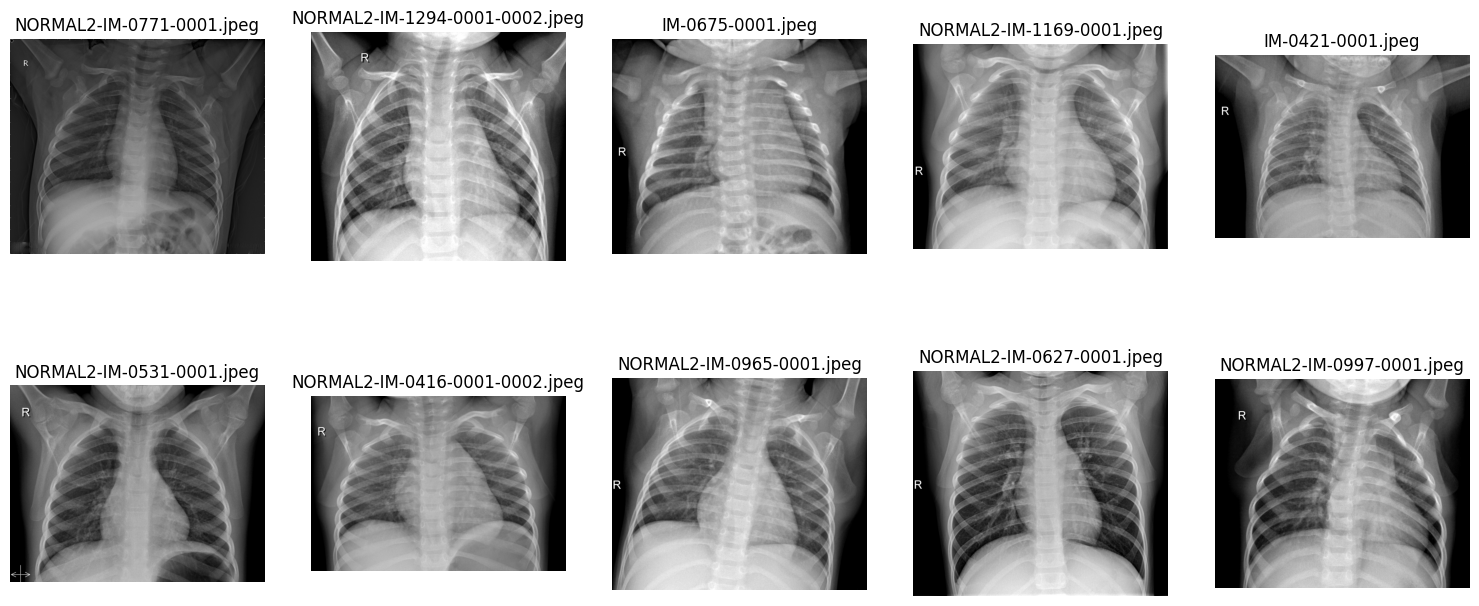

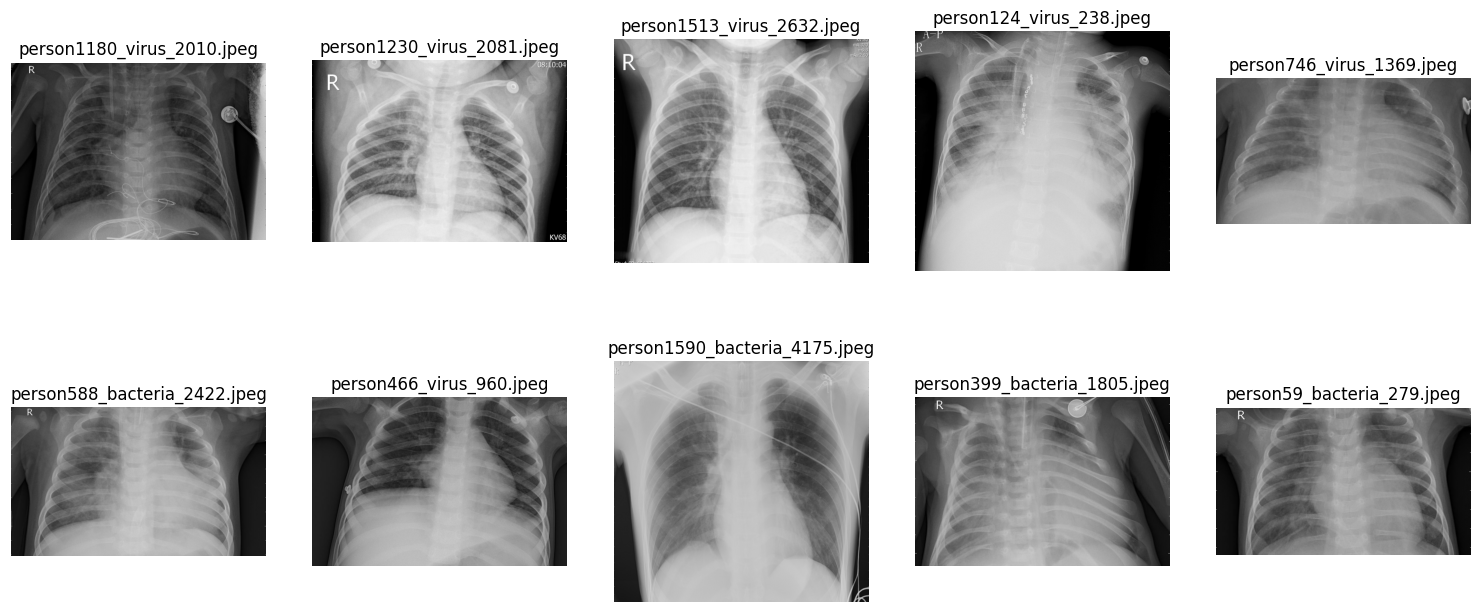

In [ ]:
# Visualizing the Images which are directories
# Normal Images
plt.figure(figsize=(15,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  img  = Image.open(train_normal + os.listdir(train_normal)[i])
  plt.title(os.listdir(train_normal)[i])
  plt.tight_layout()
  plt.imshow(img,cmap='grey')
  plt.axis('off')

# Infected Images
plt.figure(figsize=(15,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  img  = Image.open(train_pneumonia + os.listdir(train_pneumonia)[i])
  plt.title(os.listdir(train_pneumonia)[i])
  plt.tight_layout()
  plt.imshow(img,cmap='grey')
  plt.axis('off')

# Normalization and Data Augmentations

In [ ]:
# Using ImageDataGenerator for normalising the Data Augmentations for adding variance in data

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   horizontal_flip = True,
                                   zoom_range = 0.2,
                                   shear_range = 0.1,
                                   fill_mode = 'reflect',
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

# preprocessing of Directories

In [ ]:
train_dir = path + '/chest_xray/train'
test_dir = path + '/chest_xray/test'
val_dir = path + '/chest_xray/val'

training_set = train_datagen.flow_from_directory(directory = train_dir,
                                                 batch_size = 32,
                                                 target_size = (150,150),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale',
                                                 shuffle = True
                                                 )

testing_set = test_datagen.flow_from_directory(directory = test_dir,
                                                 batch_size = 32,
                                                 target_size = (150,150),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale',
                                                 shuffle = True
                                                 )
validation_set = val_datagen.flow_from_directory(directory = val_dir,
                                                 batch_size = 32,
                                                 target_size = (150,150),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale'
                                                 )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Model Building

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3,), activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,995,649 (7.61 MB)

 Trainable params: 1,994,689 (7.61 MB)

 Non-trainable params: 960 (3.75 KB)

# Callbacks and EarlyStopping

In [ ]:
learning_rate = ReduceLROnPlateau(monitor='val_accuracy',patience=2,
                                  factor=0.30, min_lr=0.000001,
                                  verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',patience=5,
                               restore_best_weights=True, verbose=0)

In [ ]:
history = model.fit(training_set,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = validation_set,
                    verbose = 1,
                    callbacks = [learning_rate,early_stopping])

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 424ms/step - accuracy: 0.8452 - loss: 0.6250 - val_accuracy: 0.5000 - val_loss: 23.5850 - learning_rate: 0.0010
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 265ms/step - accuracy: 0.9154 - loss: 0.2339 - val_accuracy: 0.5000 - val_loss: 8.3669 - learning_rate: 0.0010
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9085 - loss: 0.2341
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 291ms/step - accuracy: 0.9085 - loss: 0.2339 - val_accuracy: 0.5000 - val_loss: 20.8577 - learning_rate: 0.0010
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 51s 313ms/step - accuracy: 0.9285 - loss: 0.1872 - val_accuracy: 0.5000 - val_loss: 11.7763 - learning_rate: 3.0000e-04
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 304ms/step - accuracy: 0.9323 - loss: 0.1764 - val_accuracy: 0.6250 - val_loss: 2.4316 - learning_rate: 3.0000e-04
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accu

# Saving model

In [ ]:
# saving model using pickle
import pickle

with open('model_medical.pkl','wb') as file:
    pickle.dump(model,file)

# Validation Loss and Validation Accuracy

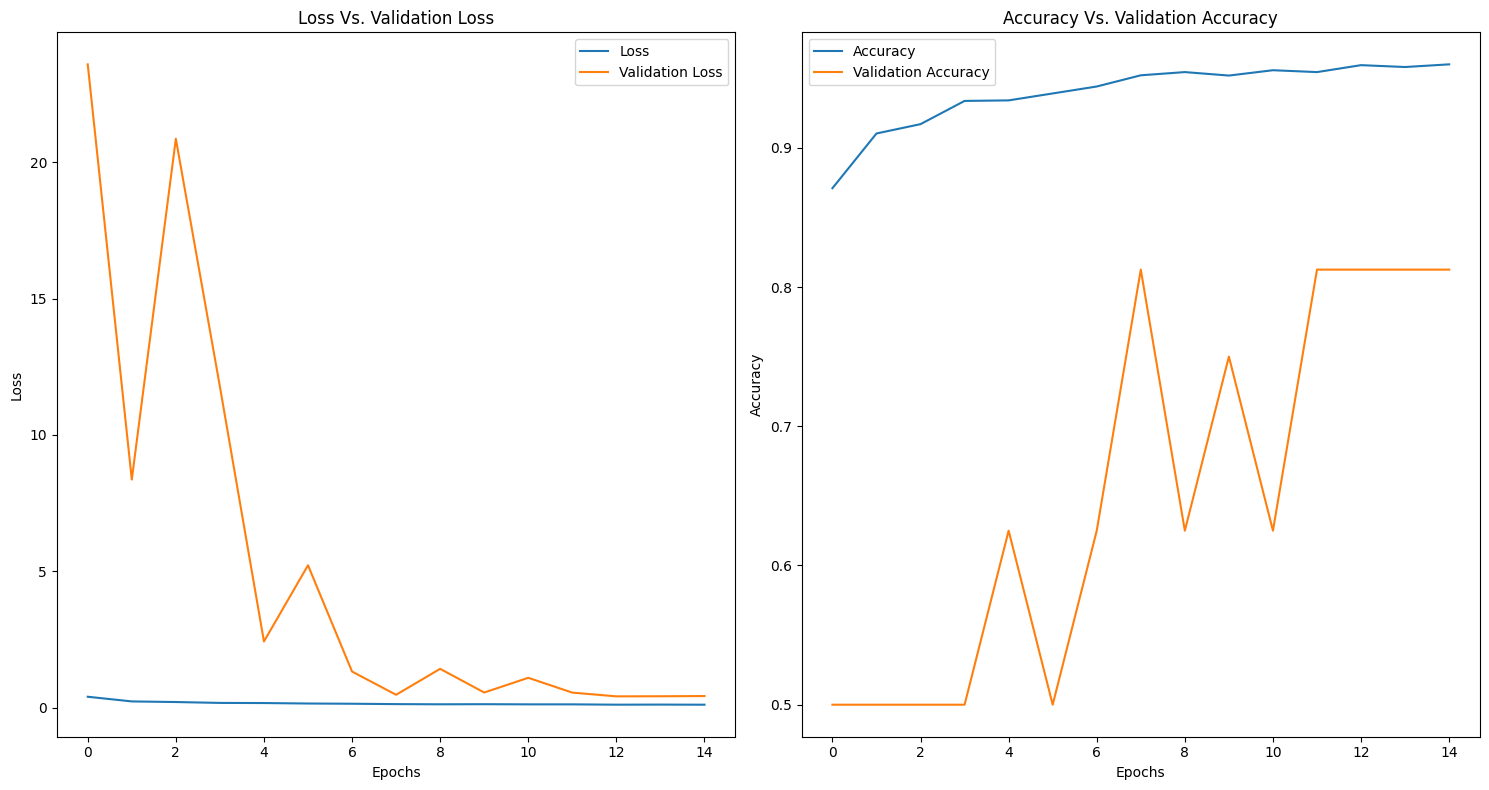

In [ ]:
# Loss Vs. Validation Loss
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs. Validation Loss")
plt.legend()
# Accuarcy Vs. Validation Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs. Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Accuracy of training set
loss, accuracy = model.evaluate(training_set)
print(f"\nAccuracy of the model (training) : {accuracy:.4f}")

163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 264ms/step - accuracy: 0.9565 - loss: 0.1187

Accuracy of the model (training) : 0.9569


In [ ]:
# Accuracy of Testing set
loss, accuracy = model.evaluate(testing_set)
print(f"\nAccuracy of the model (Testing) : {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - accuracy: 0.9192 - loss: 0.2326

Accuracy of the model (Testing) : 0.9199


# Loading Model

In [ ]:
# Loading the model
import pickle
with open('model_medical.pkl','rb') as file:
  loaded_model = pickle.load(file)

# Prediction of Testing Set

In [ ]:
# creating a dataframe consisting of image path and actual labels

Testing_df = pd.DataFrame()
images = []
actual_labels = []

for i in os.listdir(test_normal):
    img = test_normal + i
    label = 'NORMAL'
    images.append(img)
    actual_labels.append(label)

for j in os.listdir(test_pneumonia):
  img = test_pneumonia + j
  label = 'PNEUMONIA'
  images.append(img)
  actual_labels.append(label)

Testing_df['images'] = images
Testing_df['actual_labels'] = actual_labels
Testing_df.head(5)

,images,actual_labels
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [ ]:
# Adding predicting labels in dataframe

predict_labels = []

for i in Testing_df['images']:
    img = Image.open(i)
    img = img.resize((150,150))
    img = np.array(img)
    img = img.astype('float32')/255
    prediction = loaded_model.predict(img.reshape(-1,150,150,1))
    if prediction < 0.50:
       pred = 'NORMAL'
    else :
      pred = 'PNEUMONIA'
    predict_labels.append(pred)

Testing_df['predicted_labels'] = predict_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

# Randomly Visualizing the Actual Vs. Predicted Labels

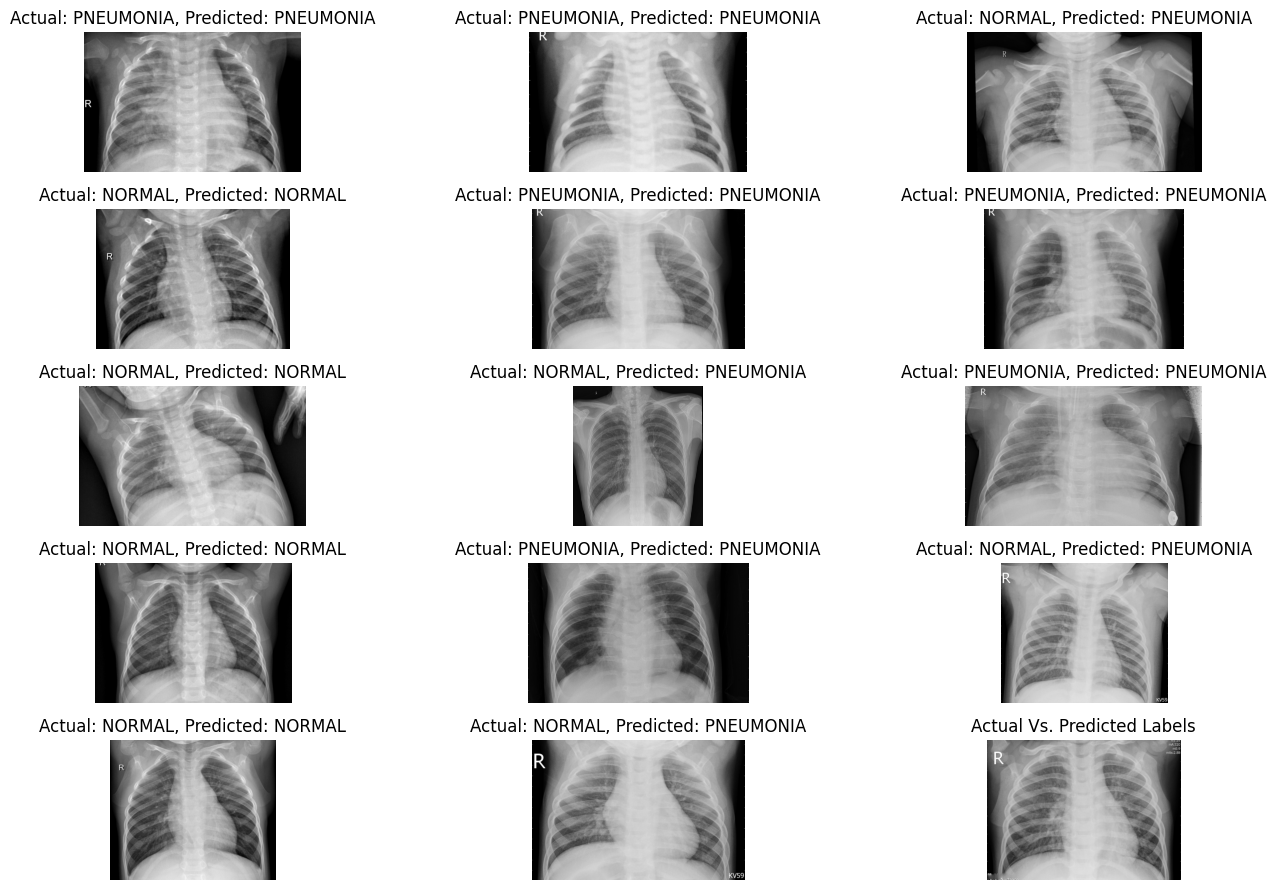

In [ ]:
# randomly selecting some images from dataset
random_selection = Testing_df.sample(15,random_state=42).reset_index()

# Visualizing images
plt.figure(figsize=(15,9))
for i in range(len(random_selection)):
    plt.subplot(5,3,i+1)
    image = Image.open(str(random_selection['images'][i]))
    plt.imshow(image, cmap='grey')
    plt.title(f"Actual: {random_selection['actual_labels'][i]}, Predicted: {random_selection['predicted_labels'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.title("Actual Vs. Predicted Labels")
plt.show()

In [ ]:
Testing_df['actual_labels']

,actual_labels
0,NORMAL
1,NORMAL
2,NORMAL
3,NORMAL
4,NORMAL
...,...
619,PNEUMONIA
620,PNEUMONIA
621,PNEUMONIA
622,PNEUMONIA


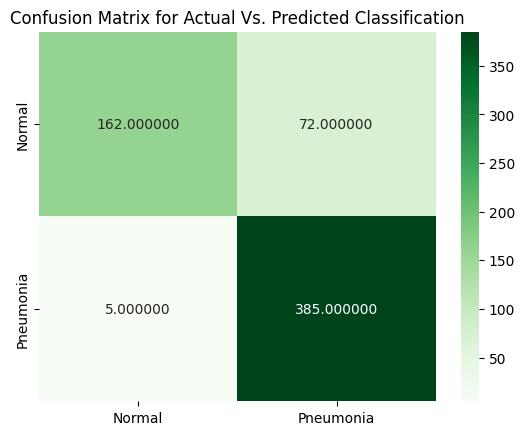

In [ ]:
# visualizing the miss classified data using heatmaps

cm = confusion_matrix(Testing_df['actual_labels'],Testing_df['predicted_labels'])
sns.heatmap(cm, cmap='Greens', annot=True, fmt='2f', xticklabels=['Normal','Pneumonia'],yticklabels=['Normal','Pneumonia'])
plt.title("Confusion Matrix for Actual Vs. Predicted Classification")
plt.show()

In [ ]:
# CLASSIFICATION REPORT

print(classification_report(Testing_df['actual_labels'],Testing_df['predicted_labels']))

              precision    recall  f1-score   support

      NORMAL       0.97      0.69      0.81       234
   PNEUMONIA       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624

